<a href="https://colab.research.google.com/github/Abhi-devalapalli/house-price-prediction-using-linear-regression/blob/main/house_price_prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
dataset = pd.read_csv('/content/data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
dataset.shape

(4600, 18)

In [ ]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
dataset.drop(['date'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
dataset.country.value_counts()

USA    4600
Name: country, dtype: int64

In [ ]:
dataset.drop(['country'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [ ]:
dataset.drop(['street', 'city'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


In [ ]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

<ipython-input-11-1907685780b2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataset.corr()


<Axes: >

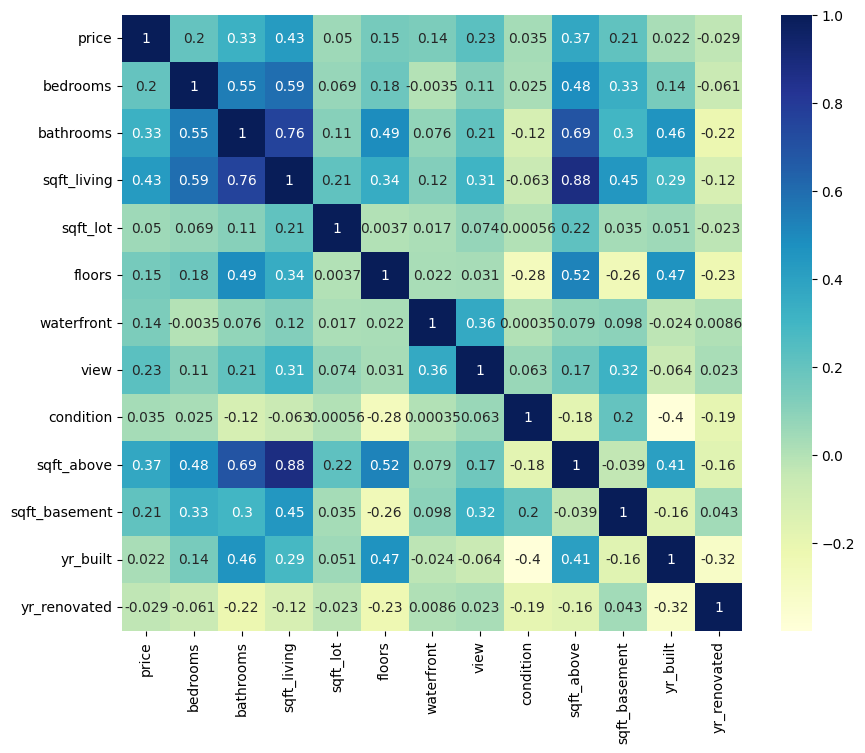

In [ ]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
cor = dataset.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

<Axes: xlabel='bedrooms', ylabel='price'>

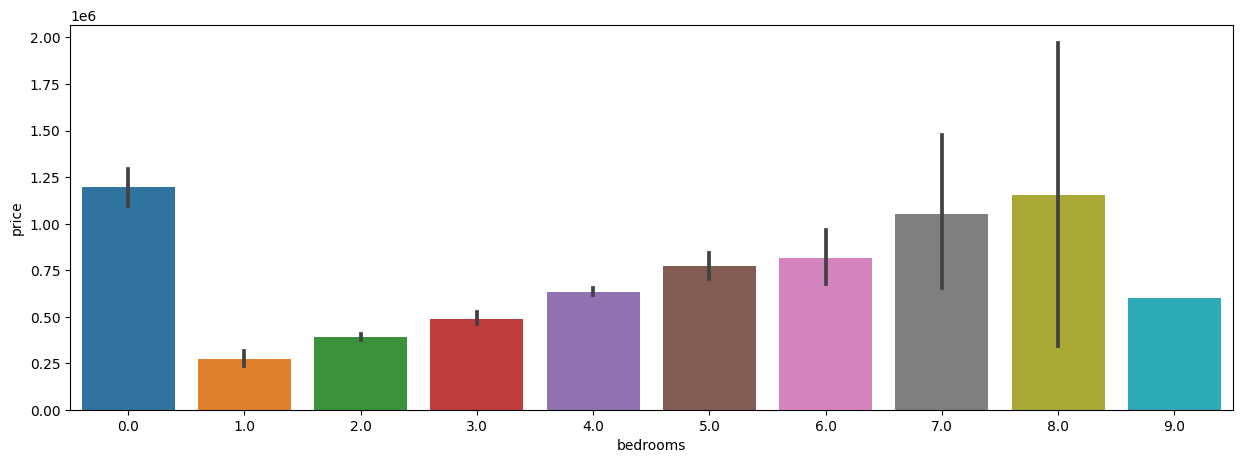

In [ ]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = dataset.bedrooms, y = dataset.price)

In [ ]:
dataset.groupby('bedrooms').price.agg([len, min, max])

,len,min,max
bedrooms,,,
0.0,2,1095000.0,1295648.0
1.0,38,0.0,540000.0
2.0,566,0.0,1695000.0
3.0,2032,0.0,26590000.0
4.0,1531,0.0,4489000.0
5.0,353,0.0,7062500.0
6.0,61,0.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,2,340000.0,1970000.0


In [ ]:
df = dataset[(dataset.bedrooms > 0) & (dataset.bedrooms < 9)].copy()

In [ ]:
df.shape

(4597, 14)

In [ ]:
df.statezip.value_counts()

WA 98103    147
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

<Axes: xlabel='price', ylabel='statezip'>

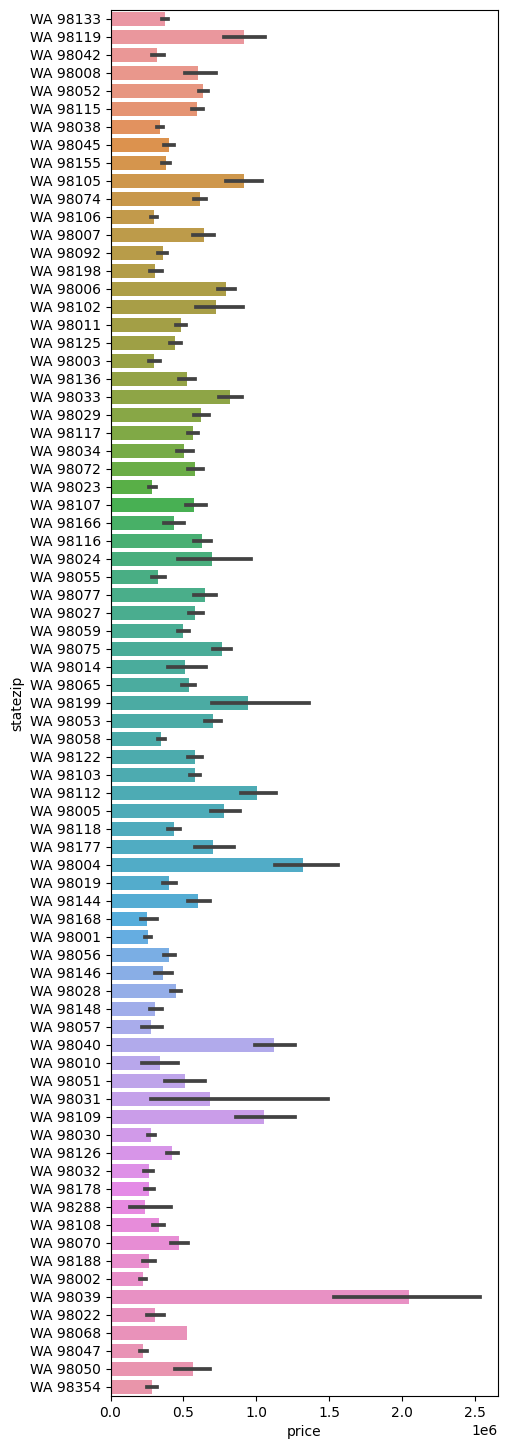

In [ ]:
a4_dims = (5, 18)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = df.price, y = df.statezip)

<ipython-input-18-2c5b3bde27e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)


<Axes: xlabel='price', ylabel='Density'>

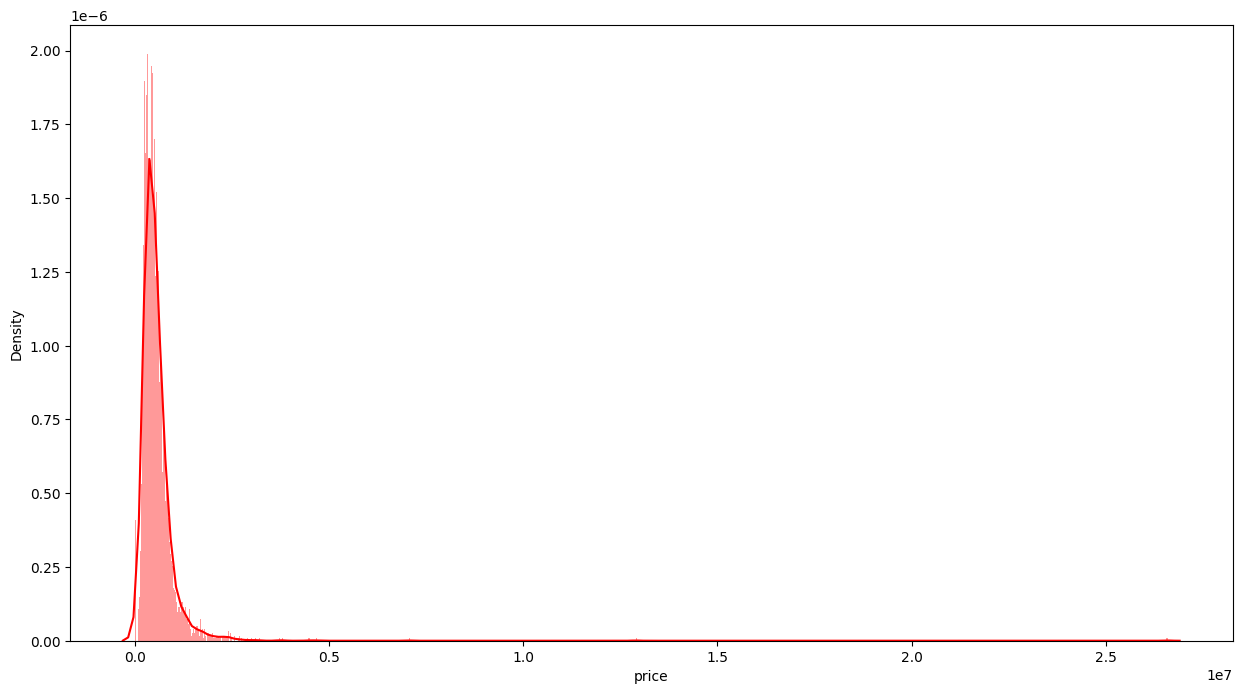

In [ ]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)

In [ ]:
df.price.agg([min, max])

min           0.0
max    26590000.0
Name: price, dtype: float64

In [ ]:
len(df[(df.price == 0)])

49

<Axes: xlabel='bathrooms', ylabel='price'>

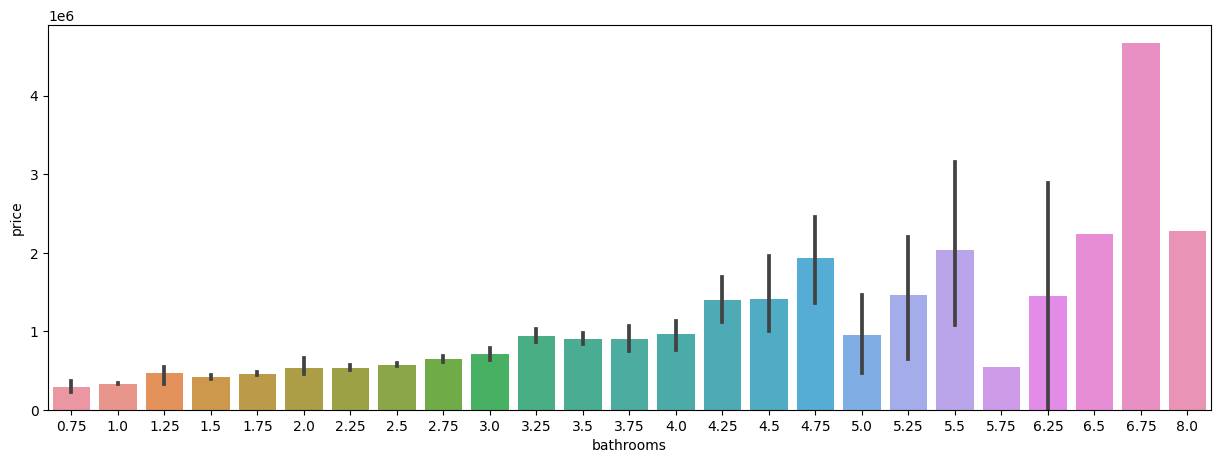

In [ ]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bathrooms, y = df.price)

In [ ]:
zero_price = df[(df.price == 0)].copy()
zero_price.shape

(49, 14)

In [ ]:
zero_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,WA 98001
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,WA 98199
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,WA 98146
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,WA 98075
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,WA 98166


<ipython-input-24-8ee1facfc87a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_price.sqft_living)


<Axes: xlabel='sqft_living', ylabel='Density'>

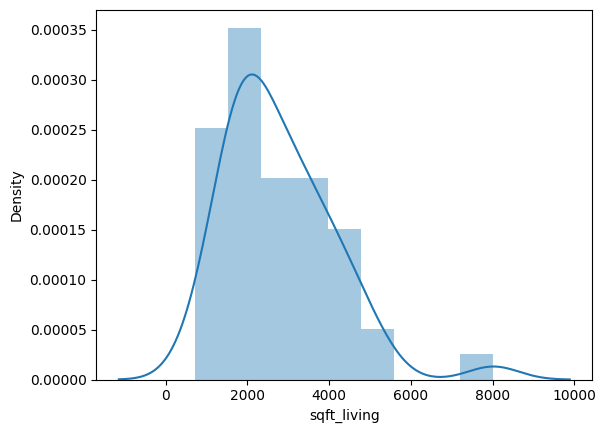

In [ ]:
sns.distplot(zero_price.sqft_living)

In [ ]:
zero_price.agg([min, max, 'mean', 'median'])

<ipython-input-25-2dec96c144ab>:1: FutureWarning: ['statezip'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  zero_price.agg([min, max, 'mean', 'median'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
min,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,WA 98001
max,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,WA 98199
mean,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN
median,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN


In [ ]:
sim_from_ori = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)].copy()

In [ ]:
sim_from_ori.shape

(79, 14)

In [ ]:
sim_from_ori.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
11,1400000.0,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,WA 98105
172,407000.0,4.0,2.25,2810,23400,1.0,0,1,3,1710,1100,1958,2004,WA 98198
207,360000.0,4.0,2.00,2680,18768,1.0,0,0,5,2680,0,1965,0,WA 98001
257,749950.0,4.0,2.75,2600,6050,2.0,0,0,5,1960,640,1949,0,WA 98116
261,581000.0,4.0,2.00,2510,13695,1.0,0,0,4,1280,1230,1961,2001,WA 98033


In [ ]:
sim_from_ori.price.mean()

735475.0370705189

In [ ]:
yr_sqft = df[(df.sqft_living > 2499) & (df.sqft_living < 2900)].copy()
yr_price_avg = yr_sqft.groupby('yr_built').price.agg('mean')

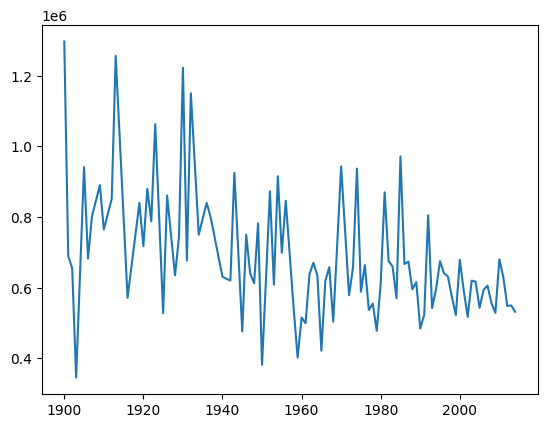

In [ ]:
plt.plot(yr_price_avg)

In [ ]:
df.price.replace(to_replace = 0, value = 735000, inplace = True)
len(df[(df.price == 0)])

0

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


In [ ]:
df.drop(['sqft_above'], axis = 1, inplace = True)
df.shape

(4597, 13)

In [ ]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4597 non-null   int64  
 1   price          4597 non-null   float64
 2   bedrooms       4597 non-null   float64
 3   bathrooms      4597 non-null   float64
 4   sqft_living    4597 non-null   int64  
 5   sqft_lot       4597 non-null   int64  
 6   floors         4597 non-null   float64
 7   waterfront     4597 non-null   int64  
 8   view           4597 non-null   int64  
 9   condition      4597 non-null   int64  
 10  sqft_basement  4597 non-null   int64  
 11  yr_built       4597 non-null   int64  
 12  yr_renovated   4597 non-null   int64  
 13  statezip       4597 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 502.9+ KB


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['statezip_encoded'] = le.fit_transform(df.statezip)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip,statezip_encoded
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,WA 98133,62
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,WA 98119,58
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,WA 98042,26
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,WA 98008,7
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,WA 98052,31


In [ ]:
df.statezip_encoded.value_counts()

47    147
31    135
56    132
54    130
5     110
     ... 
28      6
75      3
29      2
76      2
39      1
Name: statezip_encoded, Length: 77, dtype: int64

In [ ]:
df.drop(['statezip'], axis = 1, inplace = True)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip_encoded
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,62
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,58
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,26
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,7
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,31


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [ ]:
ohc_df = pd.DataFrame(ohc.fit_transform(df[['statezip_encoded']]).toarray())
# ohc_df = ohc_df.astype(int)
ohc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.join(ohc_df)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,67,68,69,70,71,72,73,74,75,76
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,67,68,69,70,71,72,73,74,75,76
4592,4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4596,4599,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['statezip_encoded'], axis = 1, inplace = True)

In [ ]:
df.info

<bound method DataFrame.info of       index         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0         0  3.130000e+05       3.0       1.50         1340      7912     1.5   
1         1  2.384000e+06       5.0       2.50         3650      9050     2.0   
2         2  3.420000e+05       3.0       2.00         1930     11947     1.0   
3         3  4.200000e+05       3.0       2.25         2000      8030     1.0   
4         4  5.500000e+05       4.0       2.50         1940     10500     1.0   
...     ...           ...       ...        ...          ...       ...     ...   
4592   4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4593   4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4594   4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4595   4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4596   4599  2.206000e+05       3.0       2.50         1490      8102     2.0

In [ ]:
df.shape

(4597, 90)

In [ ]:
X = df.iloc[:, 1:]
X.shape

(4597, 89)

In [ ]:
y = df.price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(len(X_train) / len(df))

0.8999347400478573


In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_val))

4137
230
230


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
y_val.head(10)

1073    175000.0
4524    950100.0
4434    309487.5
2572    427000.0
4310    375000.0
4017    665000.0
4241    759000.0
3139    425000.0
2283    325000.0
4200    679000.0
Name: price, dtype: float64

In [ ]:
y_test

3454    450000.0
3857    300000.0
1818    174500.0
856     215000.0
1001    430000.0
          ...   
3760    392000.0
2596    650000.0
1839    327500.0
1835    320000.0
787     317000.0
Name: price, Length: 230, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state = 42, max_depth = 10)


In [ ]:
y_val.head(10)

1073    175000.0
4524    950100.0
4434    309487.5
2572    427000.0
4310    375000.0
4017    665000.0
4241    759000.0
3139    425000.0
2283    325000.0
4200    679000.0
Name: price, dtype: float64